In [1]:
!pip install numpy panda

  Preparing metadata (setup.py) ... done
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7239 sha256=ff312ece7c2d015bc74ae78b485792b84c411a76c75488b0fd2d6b419ad0b820
  Stored in directory: /root/.cache/pip/wheels/df/5c/39/36f8dae25a1e88d6ec4411dec4a143781e64fdff6897758eec
Successfully built panda


In [2]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv("/content/titanic_pp - titanic_pp.csv")
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,female,38.0,1.0,0.0,71.2833,C,Yes
1,1,female,35.0,1.0,0.0,53.1000,S,Yes
2,1,male,54.0,0.0,0.0,51.8625,S,No
3,3,female,4.0,1.0,1.0,16.7000,S,Yes
4,1,female,58.0,0.0,0.0,26.5500,S,Yes


In [4]:
df.shape

(183, 8)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,183.0,1.191257,0.515187,1.00,1.0,1.0,1.0000,3.0000
Age,174.0,35.519655,15.676684,0.92,24.0,36.0,47.0000,80.0000
SibSp,179.0,0.463687,0.647007,0.00,0.0,0.0,1.0000,3.0000
Parch,178.0,0.477528,0.753186,0.00,0.0,0.0,1.0000,4.0000
Fare,179.0,79.434032,76.981423,0.00,29.7,57.0,90.5396,512.3292


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    183 non-null    int64  
 1   Sex       183 non-null    object 
 2   Age       174 non-null    float64
 3   SibSp     179 non-null    float64
 4   Parch     178 non-null    float64
 5   Fare      179 non-null    float64
 6   Embarked  173 non-null    object 
 7   Survived  183 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 11.6+ KB


In [7]:
print(df.isnull().sum())


Pclass       0
Sex          0
Age          9
SibSp        4
Parch        5
Fare         4
Embarked    10
Survived     0
dtype: int64


In [8]:

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
  df[col]=label_encoder.fit_transform(df[col])

In [9]:
df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,38.0,1.0,0.0,71.2833,0,1
1,1,0,35.0,1.0,0.0,53.1000,2,1
2,1,1,54.0,0.0,0.0,51.8625,2,0
3,3,0,4.0,1.0,1.0,16.7000,2,1
4,1,0,58.0,0.0,0.0,26.5500,2,1
5,2,1,NaN,0.0,0.0,13.0000,2,1
6,1,1,28.0,0.0,0.0,35.5000,2,1
7,1,1,19.0,3.0,NaN,263.0000,3,0
8,1,0,49.0,1.0,0.0,76.7292,0,1
9,1,1,65.0,0.0,1.0,61.9792,0,0


In [10]:
#fill null value with mean
df['Age']=df['Age'].fillna(df['Age'].mean())
df['SibSp']=df['SibSp'].fillna(df['SibSp'].mean())
df['Parch']=df['Parch'].fillna(df['Parch'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mean())



In [11]:
df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,38.000000,1.0,0.000000,71.2833,0,1
1,1,0,35.000000,1.0,0.000000,53.1000,2,1
2,1,1,54.000000,0.0,0.000000,51.8625,2,0
3,3,0,4.000000,1.0,1.000000,16.7000,2,1
4,1,0,58.000000,0.0,0.000000,26.5500,2,1
5,2,1,35.519655,0.0,0.000000,13.0000,2,1
6,1,1,28.000000,0.0,0.000000,35.5000,2,1
7,1,1,19.000000,3.0,0.477528,263.0000,3,0
8,1,0,49.000000,1.0,0.000000,76.7292,0,1
9,1,1,65.000000,0.0,1.000000,61.9792,0,0


In [12]:
print(df.duplicated().sum)

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
178    False
179    False
180    False
181    False
182    False
Length: 183, dtype: bool>


In [13]:
#find outlier
for col in df.select_dtypes(include=['number']).columns:
  col_mean=df[col].mean()
  col_std=df[col].std()
  col_mean=df[col].mean()
  lower_outlier=col_mean-(3*col_std)
  uper_outlier=col_mean+(3*col_std)

  df=df[(df[col]>=lower_outlier) & (df[col]<= uper_outlier)]

In [14]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,38.000000,1.0,0.0,71.2833,0,1
1,1,0,35.000000,1.0,0.0,53.1000,2,1
2,1,1,54.000000,0.0,0.0,51.8625,2,0
4,1,0,58.000000,0.0,0.0,26.5500,2,1
5,2,1,35.519655,0.0,0.0,13.0000,2,1


In [15]:
!pip install scikit-learn


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

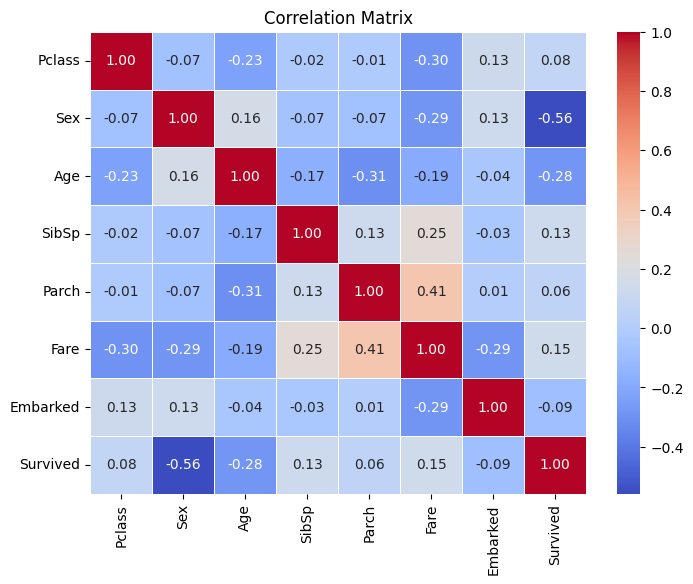

In [17]:
#see correlation matrix for check is there any tightly coupled ccolumn or not
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [19]:
#split the data in two dataframe one if for input feature another for target
x=df.drop('Survived',axis=1)
y=df['Survived']

x.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,38.000000,1.0,0.0,71.2833,0
1,1,0,35.000000,1.0,0.0,53.1000,2
2,1,1,54.000000,0.0,0.0,51.8625,2
4,1,0,58.000000,0.0,0.0,26.5500,2
5,2,1,35.519655,0.0,0.0,13.0000,2


In [20]:
y.head()

,Survived
0,1
1,1
2,0
4,1
5,1


In [21]:
#split data into for traing part and test part
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)



LinearRegression()

In [26]:
data1 = {'Pclass': 2, 'Sex': 1, 'Age': 48, 'SibSp': 0, 'Parch': 1,'Fare':71.2833,'Embarked':0}

# Convert to DataFrame
new_data = pd.DataFrame([data1])

In [27]:
predict=lin_model.predict(new_data)
predict

array([0.16768401])

In [28]:
y_pred = lin_model.predict(x_test)
print(f"Predicted value: {y_pred}")

Predicted value: [0.40888634 1.00629046 0.32008455 0.91973442 0.36639479 0.77547165
 0.98384069 0.34797084 0.97156571 0.47123787 0.47257264 0.86489109
 0.37536363 0.90248077 0.35633932 1.04860878 0.39753631 1.02504683
 0.95393522 0.77488772 1.09597502 1.06469259 0.52282661 0.79848424
 0.38503943 0.3903814  0.83019236 0.3442843  0.98029302 0.62652741
 0.45434461 1.07363606 0.41241853 0.75691238 1.06728712 0.28984106
 0.92269395 0.48258875 1.049201   1.03238834 1.14096604 0.58122323
 0.58311632 0.57532145 0.93102192 0.34783096 0.47783288 0.99936069
 1.08213872 0.14854811 0.48258875 0.76777766 0.38731051 1.01732328
 0.94069418 0.96879158 0.50050088 0.89449091 0.90300934 0.93690728
 0.71345199 0.22754637 0.45706423 0.99419209 0.8270889  0.94907496
 0.60528426 0.41051162 0.99544227 0.81919432 1.04092477 0.28422958
 0.880084   0.5066422  0.82079513 1.00189438 0.96133308 0.42171648
 0.26328185 0.9236514  0.26229042 0.4461362  0.24356848 0.51849025]


In [29]:
print('cofficient',lin_model.coef_)

cofficient [-0.20846258 -0.5287967  -0.00614132  0.07936968  0.00480134 -0.00084077
 -0.03049233]


In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)


print("Model performance matrix")
print(f"MAE:{mae:.4f}")
print(f"MSE:{mse:.4f}")
print(f"R2 Score:{r2:.4f}")


Model performance matrix
MAE:0.2893
MSE:0.1411
R2 Score:0.3086


In [31]:
import pickle
with open('titatic_model.pkl', 'wb') as f:
    pickle.dump(lin_model, f)

In [32]:
with open('titatnic_model_encoder.pkl','wb')as f:
  pickle.dump(label_encoder,f)

In [ ]:
import statsmodels.api as sm

In [ ]:
x=sm.add_constant(x)

In [ ]:
model=sm.OLS(y,x).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     18.80
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.08e-14
Time:                        05:01:12   Log-Likelihood:                -865.81
No. Observations:                 167   AIC:                             1744.
Df Residuals:                     161   BIC:                             1762.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.4426     19.660      7.652      0.0

In [ ]:
print(model.model.exog_names)


['const', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']


In [ ]:

data2 = {'Pclass': 2, 'Sex': 1, 'Age': 48, 'SibSp': 0, 'Parch': 1}
new_data = pd.DataFrame([data2])


new_data = sm.add_constant(new_data, has_constant='add')



# Predict
prediction = model.predict(new_data)
print("Predicted value:", prediction.iloc[0])


Predicted value: 7.869204397553478


In [ ]:
X = df[['Pclass', 'Sex','SibSp', 'Parch']]
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     22.97
Date:                Mon, 05 May 2025   Prob (F-statistic):           4.73e-15
Time:                        05:04:29   Log-Likelihood:                -866.69
No. Observations:                 167   AIC:                             1743.
Df Residuals:                     162   BIC:                             1759.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.3799     14.697      9.075      0.0

In [ ]:
print(model.model.exog_names)

['const', 'Pclass', 'Sex', 'SibSp', 'Parch']


In [ ]:
# New data
data3 = {'Pclass': 2, 'Sex': 1, 'SibSp': 0, 'Parch': 1}
new_data2 = pd.DataFrame([data3])
new_data2 = sm.add_constant(new_data2, has_constant='add')

prediction = model.predict(new_data2)
print("Predicted value:", prediction)


Predicted value: 0    15.426393
dtype: float64
